# Logistive Regression

In [5]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# import data
from sklearn.datasets import load_digits
digits=load_digits()

In [7]:
# input labels like x
digits.data.shape
X=digits.data
# 1797 pictures and its size is 64 like 8*8

In [8]:
# output labels like y
digits.target.shape
y=digits.target

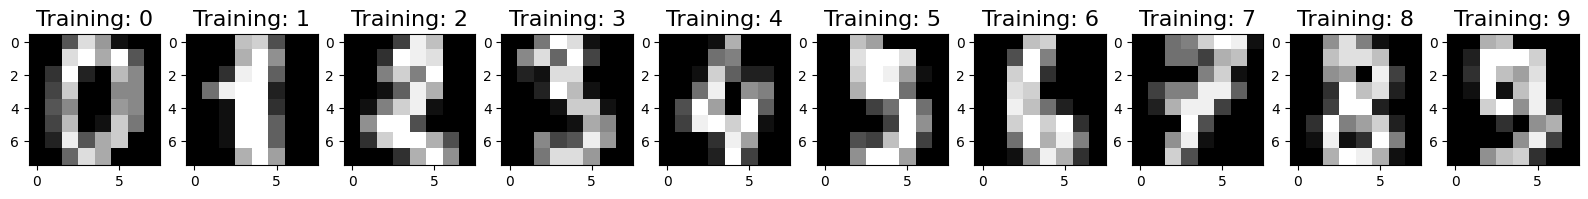

In [9]:
# Create a figure with a specified size
plt.figure(figsize=(20, 4))

# Loop through the first 10 digits and display them in subplots
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=16)

plt.show()

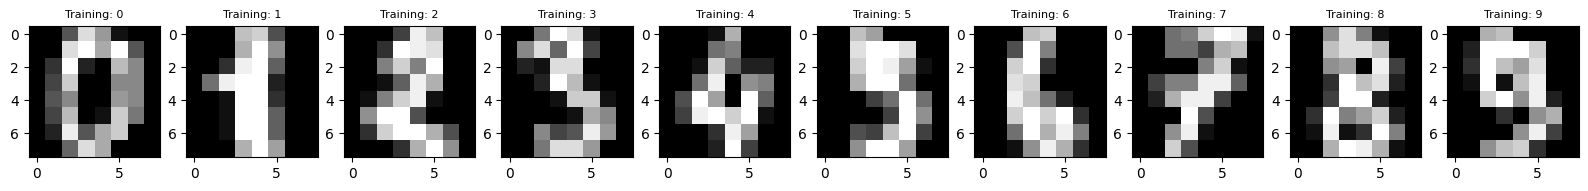

In [17]:
# Create a figure with a specified size
plt.figure(figsize=(20, 4))

# Loop through the first 10 digits and display them in subplots
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=8)

plt.show()

In [10]:
 # how measure the accuracy of model
  #split data and train
  # import library
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
# note train will be write before

In [11]:
print("train input data:", X_train.shape)
print("train input data:", X_test.shape)
print("train output data:", y_train.shape)
print("train output data:", y_test.shape)


train input data: (1437, 64)
train input data: (360, 64)
train output data: (1437,)
train output data: (360,)


In [12]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression().fit(X_train, y_train)
model

c:\Users\HP\Desktop\python\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [13]:
predictions=model.predict(X_test[0:10])
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [14]:
# accuracy
score=model.score(X_test, y_test)
print("the accuracy is :",score)

the accuracy is : 0.9666666666666667


In [16]:
# confussion matrixes
from sklearn import metrics


predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


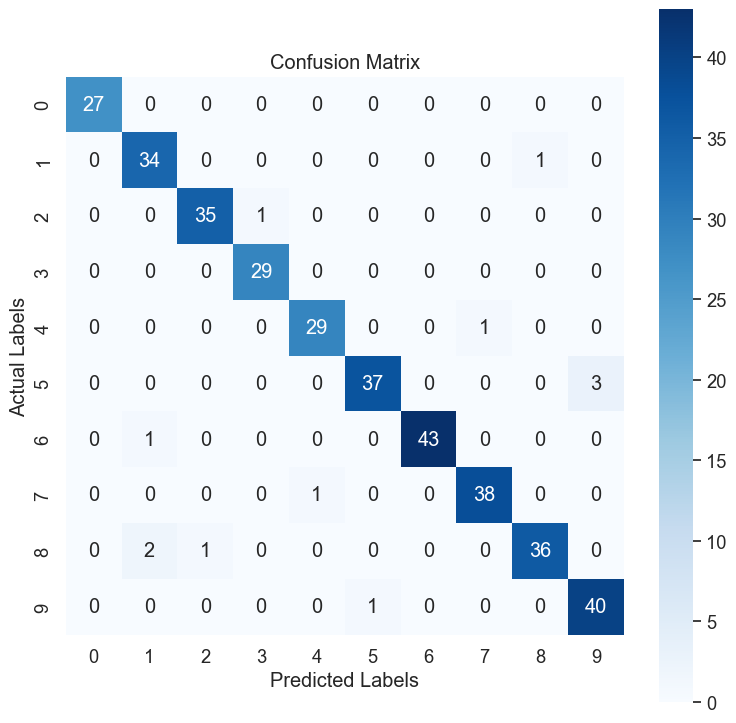

In [62]:
import seaborn as sns
# Set the figure size
plt.figure(figsize=(9, 9))

# Create a heatmap with Seaborn
sns.set(font_scale=1.2)  # Adjust font size
sns.set_style("whitegrid")  # Set a white grid background
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True)  # Display values, use a blue colormap, and square plot

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

# Show the plot
plt.show()

In [63]:
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


In [64]:
import numpy as np
import matplotlib.pyplot as plt
# Find the misclassified samples
misclassified_indices = np.where(predictions != y_test)[0]
misclassified_labels = y_test[misclassified_indices]
misclassified_predictions = predictions[misclassified_indices]

# Print misclassified samples and their actual/predicted labels
for idx in range(len(misclassified_labels)):
    actual_label = misclassified_labels[idx]
    predicted_label = misclassified_predictions[idx]
    print(f"Sample {misclassified_indices[idx]} - Actual: {actual_label}, Predicted: {predicted_label}")

Sample 56 - Actual: 5, Predicted: 9
Sample 84 - Actual: 5, Predicted: 9
Sample 94 - Actual: 7, Predicted: 4
Sample 118 - Actual: 6, Predicted: 1
Sample 124 - Actual: 8, Predicted: 1
Sample 130 - Actual: 9, Predicted: 5
Sample 181 - Actual: 5, Predicted: 9
Sample 196 - Actual: 8, Predicted: 1
Sample 235 - Actual: 2, Predicted: 3
Sample 315 - Actual: 4, Predicted: 7
Sample 331 - Actual: 1, Predicted: 8
Sample 335 - Actual: 8, Predicted: 2


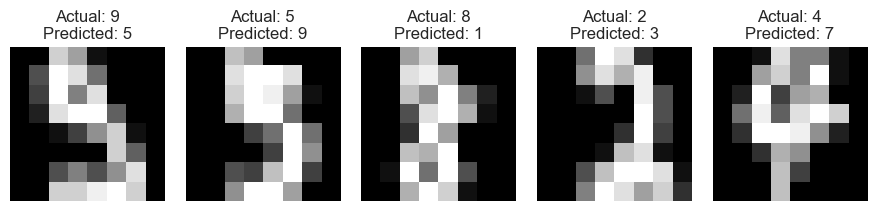

In [83]:
# Plot the misclassified digits
plt.figure(figsize=(9, 4))
for plotindex, badindex in enumerate(misclassified_indices[5:10]):
    plt.subplot(1,5 ,plotindex + 1)  # 2 rows, 5 columns
    plt.imshow(X_test[badindex].reshape(8, 8), cmap='gray')
    plt.title(f"Actual: {y_test[badindex]}\nPredicted: {predictions[badindex]}", fontsize=12)
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()